# Project 3 Uganda Tables & Estimations

### also some rough project outline ~~

In [19]:
!pip install CFEDemands --upgrade
!pip install ConsumerDemands
!pip install oauth2client
!pip install eep153_tools
!pip install gnupg
#!pip install dvc

Requirement already up-to-date: CFEDemands in /opt/conda/lib/python3.9/site-packages (0.4.1)


In [ ]:
from eep153_tools.sheets import read_sheets
import numpy as np
import pandas as pd

### Reading in Google Sheets:

In [20]:
InputFiles = {'Expenditures':('1mZcHvSD55wGCicdqxbEnioE3AOXM_pVb6zVwHhtBzSk','Expenditures'),
              'Consumption':('1RT5AfbZbWx-CmNaOHLp7aD9qEjgjiBv8lZmPexuKEWg','Consumption'),
              'HH Characteristics':('1mZcHvSD55wGCicdqxbEnioE3AOXM_pVb6zVwHhtBzSk','HH Characteristics')}
              
    #,'FCT':('1TM7FpKURXFAuXW4dLpGt98QA2CH4WTDty-4nPOUv1Mg','05 NV_sum_57 (per 100g EP)')}

#### Function for reading in sheets:

In [21]:
def get_clean_sheet(key,sheet=None):

    dfs = read_sheets(key)

    if sheet is not None:
        df = dfs[sheet]
    else:
        df = dfs.values()[0]
        
    df.columns = [c.strip() for c in df.columns.tolist()]

    df = df.loc[:,~df.columns.duplicated(keep='first')]   

    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

    df = df.loc[~df.index.duplicated(), :]

    return df

## Expenditures Table

In [22]:
x = get_clean_sheet(InputFiles['Expenditures'][0],
                    sheet=InputFiles['Expenditures'][1])

if 'm' not in x.columns:
    x['m'] = 1

x = x.set_index(['j','t','m'])
x.columns.name = 'i'

x = x.apply(lambda x: pd.to_numeric(x,errors='coerce'))
x = x.replace(0,np.nan)

x

Key available for students@eep153.iam.gserviceaccount.com.


,,i,Matooke(cluster),Matooke(others),avocado,beans dry,beans fresh,beef,beer,bread,cabbages,carrots,...,simsim,soda,sorghum,sugar,sweet bananas,sweet potatoes dry,sweet potatoes fresh,tea,tomatoes,watermelon
j,t,m,,,,,,,,,,,,,,,,,,,,,
1013000201,2005,1,NaN,NaN,NaN,NaN,NaN,6000.0,2400.0,NaN,NaN,NaN,...,NaN,NaN,NaN,4500.0,NaN,NaN,NaN,50.0,700.0,NaN
1013000202,2005,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013000204,2005,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013000206,2005,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1013000209,2005,1,NaN,NaN,NaN,NaN,NaN,NaN,25600.0,NaN,NaN,NaN,...,NaN,5000.0,NaN,2000.0,NaN,NaN,5000.0,100.0,200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010730012030203,2011,1,NaN,NaN,NaN,NaN,8000.0,7500.0,NaN,14000.0,NaN,NaN,...,NaN,2000.0,NaN,1700.0,NaN,NaN,1000.0,300.0,1400.0,NaN
3010730016100203,2011,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1700.0,NaN,400.0,...,NaN,NaN,NaN,900.0,NaN,NaN,NaN,100.0,1000.0,NaN
3010830020020503,2011,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,800.0,NaN,...,NaN,NaN,NaN,2400.0,NaN,NaN,NaN,300.0,500.0,NaN


#### Taking log of expenditure table (x); log table (y) will be used for later estimation:

In [ ]:
y = np.log(x)

## Household Characteristics Table

In [23]:
z = get_clean_sheet(InputFiles['HH Characteristics'][0],
                    sheet=InputFiles['HH Characteristics'][1])

if 'm' not in z.columns:
    z['m'] = 1

z = z.set_index(['j','t','m'])
z.columns.name = 'k'

z = z.apply(lambda x: pd.to_numeric(x,errors='coerce'))

z

Key available for students@eep153.iam.gserviceaccount.com.


,,k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+
j,t,m,,,,,,,,,,,,,,
1013000201,2005,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1013000202,2005,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1013000204,2005,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1013000206,2005,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1013000209,2005,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3010730012030203,2011,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0
3010730016100203,2011,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3010830020020503,2011,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0


## Consumption Quantities Table

In [24]:
q = get_clean_sheet(InputFiles['Consumption'][0],
                    sheet=InputFiles['Consumption'][1])

if 'm' not in q.columns:
    q['m'] = 1

q = q.set_index(['j','t','m','u'])
q.columns.name = 'i'

q = q.apply(lambda x: pd.to_numeric(x,errors='coerce'))
q = q.replace(0,np.nan)

q

Key available for students@eep153.iam.gserviceaccount.com.


i                                            Matooke(cluster)  \
j            t    m u                                           
1.013000e+09 2005 1 Bottle (300 ml)                       NaN   
                    Bottle (500 ml)                       NaN   
                    Fish - Whole (1   2 kg)               NaN   
                    Kilogram (kg)                         NaN   
                    Litre                                 NaN   
...                                                       ...   
3.020000e+16 2011 1 Kilogram (kg)                         NaN   
                    Litre                                 NaN   
                    Packet (100 g)                        NaN   
                    Piece-Big                             NaN   
                    Piece-Small                           NaN   

i                                            Matooke(others)  avocado  \
j            t    m u                                                   
1.013000e+09 2005 1 Bottle (300 ml)                      NaN      NaN   
                    Bottle (500 ml)                      NaN      NaN   
                    Fish - Whole (1   2 kg)              NaN      NaN   
                    Kilogram (kg)                        NaN      NaN   
                    Litre                                NaN      NaN   
...                                                      ...      ...   
3.020000e+16 2011 1 Kilogram (kg)                        NaN      NaN   
                    Litre                                NaN      NaN   
                    Packet (100 g)                       NaN      NaN   
                    Piece-Big                            NaN      NaN   
                    Piece-Small                          NaN      NaN   

i                                            beans dry  beans fresh  beef  \
j            t    m u                                                       
1.013000e+09 2005 1 Bottle (300 ml)                NaN          NaN   NaN   
                    Bottle (500 ml)                NaN          NaN   NaN   
                    Fish - Whole (1   2 kg)        NaN          NaN   NaN   
                    Kilogram (kg)                  NaN          NaN   2.0   
                    Litre                          NaN          NaN   NaN   
...                                                ...          ...   ...   
3.020000e+16 2011 1 Kilogram (kg)                  NaN          NaN   NaN   
                    Litre                          NaN          NaN   NaN   
                    Packet (100 g)                 NaN          NaN   NaN   
                    Piece-Big                      NaN          NaN   NaN   
                    Piece-Small                    NaN          NaN   NaN   

i                                            beer  bread  cabbages  carrots  \
j            t    m u                                                         
1.013000e+09 2005 1 Bottle (300 ml)           NaN    NaN       NaN      NaN   
                    Bottle (500 ml)           2.0    NaN       NaN      NaN   
                    Fish - Whole (1   2 kg)   NaN    NaN       NaN      NaN   
                    Kilogram (kg)             NaN    NaN       NaN      NaN   
                    Litre                     NaN    NaN       NaN      NaN   
...                                           ...    ...       ...      ...   
3.020000e+16 2011 1 Kilogram (kg)             NaN    NaN       NaN      NaN   
                    Litre                     NaN    NaN       NaN      NaN   
                    Packet (100 g)            NaN    NaN       NaN      NaN   
                    Piece-Big                 NaN    NaN       NaN      NaN   
                    Piece-Small               NaN    NaN       NaN      NaN   

i                                            ...  simsim  soda  sorghum  \
j            t    m u                        ...                          
1.013000e+09 2005 1 Bott

## Food Conversion Table

* Do we need this? We don't have it yet because the given link doesn't work
* Will probably definitely need this for [B] Deliverable: Nutritional content of foods
* Help

In [25]:
#fct = get_clean_sheet(InputFiles['FCT'][0],
                    # sheet=InputFiles['FCT'][1])

#### This bit peculiar to Niger FCT #####
# fct = fct.loc[fct.Code.str.len()==6]
# fct = fct.set_index('Code')
# fct.columns = [v.replace('\n',' ') for v in fct.columns]
########################################

# fct.index.name = 'i'

# fct = fct.apply(lambda x: pd.to_numeric(x,errors='coerce'))

# fct

## Estimation 1: Demand

In [27]:
# Create reduced form

import cfe

result = cfe.Result(y=y,z=z)

In [28]:
result

<xarray.Result>
Dimensions:           (k: 14, j: 3737, t: 4, m: 1, i: 37)
Coordinates:
  * j                 (j) int64 1013000201 1013000202 ... 30211230006050302
  * t                 (t) int64 2005 2009 2010 2011
  * m                 (m) int64 1
  * i                 (i) <U34 'beans dry' 'beans fresh' ... 'tea' 'tomatoes'
  * k                 (k) <U7 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 31-50' 'F 51+'
Data variables: (12/20)
    alpha             object None
    beta              object None
    delta             object None
    prices            object None
    characteristics   (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... nan nan nan 1.0
    loglambdas        object None
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              object None
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 0.0 0.0 0.0 0.0 ... nan nan nan 1.0
Attributes:
    firstround:            2005
    min_proportion_items:  0.125
    min_xproducts:         30
    all_tm:                True
    common_alpha:          True
    useless_expenditures:  False
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    iterate:               False
    verbose:               False

In [29]:
# run this to be able to run the next few lines:

result.get_reduced_form()

### Coefficients for each age/sex bracket and food item:

Example understanding for the first entry (M 0-3 and 'beans dry'): 
* Holding household size constant, for every boy under the age of 3, there is a 2% reduction in household expenditures on dry beans (on average)

In [14]:
result.delta.to_dataframe().unstack('k')

delta                                \
k                                      M 0-3     M 4-8    M 9-13   M 14-18   
i                                                                            
beans dry                          -0.020105  0.091101  0.069991  0.131634   
beans fresh                         0.003502  0.138232  0.049423  0.043303   
beef                                0.012622  0.025357  0.076339  0.081080   
bread                              -0.010931 -0.010405  0.039982  0.015581   
cabbages                            0.014337 -0.007694  0.035684  0.098675   
cassava dry/flour                   0.240597  0.163090  0.237445  0.090692   
cassava fresh                      -0.003535  0.006866  0.158522  0.094510   
chicken                             0.005440 -0.043764  0.015580  0.035094   
coffee                              0.022706 -0.057133  0.028877  0.008619   
cooking oil                        -0.029436 -0.006941  0.021453  0.052854   
dodo                               -0.064294  0.010363  0.145474  0.102694   
dry/smoked fish                    -0.037726  0.043358  0.094554  0.125807   
eggs                               -0.071013  0.041225  0.006218  0.000555   
expenditure in restaurants on food -0.094559  0.037472  0.151278  0.025689   
fresh fish                          0.020568  0.080817  0.028284  0.073189   
fresh milk                         -0.001583 -0.002583 -0.014292 -0.023467   
goat meat                          -0.052198  0.101357  0.009729  0.055356   
ground nuts pounded                 0.033751  0.022292  0.009320  0.044031   
irish potatoes                      0.086792  0.069802  0.115015  0.128570   
maize cobs                         -0.064494 -0.044831  0.043807  0.182292   
maize flour                         0.009996  0.112082  0.142091  0.075552   
mangoes                            -0.012302  0.032207  0.053649 -0.052200   
margarine,butter                   -0.015707  0.022894 -0.081790 -0.020390   
matooke_1                          -0.017372  0.179616  0.051870  0.053682   
millet                              0.096938  0.067989  0.001464  0.142472   
onions                             -0.051036 -0.027855  0.030258  0.048141   
oranges                            -0.050278  0.097141  0.035387  0.028289   
other vegetables                    0.012330 -0.046587  0.078986  0.052800   
passion fruits                      0.007164 -0.067459  0.028914 -0.094513   
rice                                0.041959  0.089870  0.105172  0.099908   
salt                                0.072773  0.065634  0.082439  0.087910   
soda                               -0.011965 -0.063974  0.055411 -0.049988   
sugar                               0.012851  0.059009  0.045291  0.091241   
sweet bananas                       0.011865  0.005062  0.000327  0.025421   
sweet potatoes fresh                0.110313  0.127481  0.137242  0.100394   
tea                                -0.012445  0.016257  0.036033  0.041242   
tomatoes                           -0.040840 -0.022914  0.018166  0.050890   

                                                                            \
k                                    M 19-30   M 31-50     M 51+     F 0-3   
i                                                                            
beans dry                           0.092998  0.126748  0.192872  0.035235   
beans fresh                         0.140382  0.256491  0.353082  0.098333   
beef                                0.114490  0.197677  0.197012  0.004936   
bread                               0.133572  0.290906  0.142049  0.021215   
cabbages                            0.061728  0.060672  0.079951  0.038930   
cassava dry/flour                   0.106282  0.175328  0.190029  0.068200   
cassava fresh                       0.057267  0.043634  0.019687  0.003492   
chicken                             0.125162  0.132872  0.148593 -0.003726   
coffee                              0.098526  0.060754  0.42

### Demand of each good by year:

* The bigger the number, the bigger the DEMAND for that good, in that year
* Captures the effects of prices

In [15]:
result.a.to_dataframe().unstack('i')

a                                                              \
i      beans dry beans fresh      beef     bread  cabbages cassava dry/flour   
t    m                                                                         
2005 1  6.664045    6.166651  7.596403  6.531700  5.987894          7.000972   
2009 1  7.177776    6.660552  8.087632  7.200124  6.284722          7.403977   
2010 1  7.361983    6.874905  8.165703  7.073217  6.369316          7.427036   
2011 1  7.436129    7.184067  8.397829  7.388194  6.608653          7.770406   

                                                      ...                   \
i      cassava fresh   chicken    coffee cooking oil  ... other vegetables   
t    m                                                ...                    
2005 1      6.561716  8.220995  4.586281    6.181261  ...         5.622420   
2009 1      6.985613  8.733654  4.799347    6.605940  ...         6.134787   
2010 1      6.993906  8.798743  4.734974    6.763708  ...         6.100634   
2011 1      7.339227  9.207515  5.074747    6.940089  ...         6.475021   

                                                                             \
i      passion fruits      rice      salt      soda     sugar sweet bananas   
t    m                                                                        
2005 1       6.412390  6.868322  4.370730  7.055358  6.854877      5.973993   
2009 1       6.691317  7.375543  5.028736  7.325378  7.196572      6.407480   
2010 1       6.631896  7.440398  4.963925  7.503323  7.370396      6.422730   
2011 1       6.896860  7.743197  5.120522  7.765180  7.461896      6.816289   

                                                 
i      sweet potatoes fresh       tea  tomatoes  
t    m                                           
2005 1             6.627925  4.610117  5.958305  
2009 1             7.068341  4.678707  6.417172  
2010 1             7.447756  4.683057  6.427528  
2011 1             7.318681  4.936173  6.622662  

[4 rows x 37 columns]

## Estimation 2: Income Elasticity (beta values)

In [16]:
result.get_beta(as_df=True)

i
beans dry                             0.255622
beans fresh                           0.381523
beef                                  0.384351
bread                                 0.568417
cabbages                              0.357247
cassava dry/flour                     0.124855
cassava fresh                         0.313435
chicken                               0.322282
coffee                                0.632619
cooking oil                           0.483203
dodo                                  0.452957
dry/smoked fish                       0.351626
eggs                                  0.420556
expenditure in restaurants on food    0.460684
fresh fish                            0.412433
fresh milk                            0.567437
goat meat                             0.360544
ground nuts pounded                   0.367467
irish potatoes                        0.388275
maize cobs                            0.356432
maize flour                           0.285216
mangoes    

#### Elasticity
* The higher the beta value^, the greater the income elasticity of the good
* Elasticity: as households grow wealthier, they shift more of their income towards high beta-value items, and less towards low beta-value items
* Poorer households will consume MORE of the LOW value items, and vice versa for wealthier households

Coding note:
* Goods that don't have enough observations are automatically dropped
* This cut-off for "not enough observations" can be controlled using the min_proportion_items and min_xproducts attributes when creating the result object.

### Alpha values (?)

In [18]:
result.get_alpha(as_df=True)

i
beans dry                             6.664045
beans fresh                           6.166651
beef                                  7.596403
bread                                 6.531700
cabbages                              5.987894
cassava dry/flour                     7.000972
cassava fresh                         6.561716
chicken                               8.220995
coffee                                4.586281
cooking oil                           6.181261
dodo                                  5.544825
dry/smoked fish                       6.631332
eggs                                  6.238671
expenditure in restaurants on food    7.874761
fresh fish                            7.076956
fresh milk                            7.007019
goat meat                             7.402044
ground nuts pounded                   6.263604
irish potatoes                        6.686252
maize cobs                            6.026852
maize flour                           6.736053
mangoes    

#### According to professor:

* "these [alpha and beta values] are the preference parameters that you can plug in when you construct a utility function"
* "you can construct demand schedules based on knowing the alpha and beta parameters"
* Consult Consumer Food Demand lecture for more!!!

## ESTIMATION IS DONE, NOW: How well does our estimated model predict the values of log expenditures in the data?

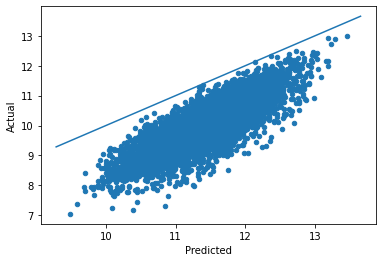

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

* Lol none of our dots are on the line
* Not a great predictor
* Bias for the predicted value to be less than the actual value
* But I mean... it gets the general increasing trend???

# TO-DO: Need to do more in-detail work using the estimations that are already done^^^, for [B] deliverable:

### [B] Estimate Demand System

Deliverable instructions: 
* (DONE) Estimate a system of demands for different kinds of food
* CHARACTERIZE HOW CONSUMPTION VARIES WITH HOUSEHOLD NEED

In [33]:
# Do this here





# TO-DO: Go over Consumer Food Demand lecture, use it for Engel's Law deliverable:

### [B] Engel's Law: DOES the share of food in a household's budget fall within the overall size of the budget?

* How do we calculate this using the information we have?

In [34]:
# Do this here




# TO-DO: Find FCT Data that actually exists

### [B] Nutritional Adequacy of Diet

#### We need Food Conversion Table data to answer this; FIND IT !!!

Deliverable instructions: 
* Given the food actually consumed in your data, what can you say about the adequacy of the diets in the population you’re studying?
* What proportion of households consume enough so that members will exceed dietary recommendations? What proportion do not?

In [ ]:
# Do this here


